# Input

In [49]:
# Enter desired resolution of mesh in metres.
# Room size is 4m x 3m. A mesh resolution of 0.1m is recommended.
dx = 0.1

# Save output grid data as csv? Output will be saved as output.csv in same folder.
savecsv = False

# Where are the data files located?
datalocation = "../Case0/Plane Output/"

# Output time
time = 600.0

# Scroll down to view interpolated data and other output.

# Header Files

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import CFD Data

In [51]:
filename = datalocation + 'planeoutput-' + str(int(time*10)) #+ '.000000'
table = pd.read_csv(filename, delimiter=',')
array = np.array(table)
count = 0
print('Array has the following variables.')
for name in table.columns:
    print(count, name)
    count+=1

Array has the following variables.
0 cellnumber
1     x-coordinate
2     y-coordinate
3     z-coordinate
4         pressure
5 dynamic-pressure
6 absolute-pressure
7   total-pressure
8       x-velocity
9       y-velocity
10       z-velocity
11      temperature
12 total-temperature
13 dpm-concentration
14  dpm-mass-source
15 dpm-x-mom-source
16 dpm-y-mom-source
17 dpm-z-mom-source
18 num-virions-inhaled
19 num-virions-inhaled-1min
20 prob_infection-x100
21 prob_infection-x100-1h
22 prob_infection-x100-10h
23 prob_infection_1min-x100
24 prob_infection_1min-x100-1h
25 prob_infection_1min-x100-10h


Text(0.5, 1.0, 'Raw CFD data before interpolation')

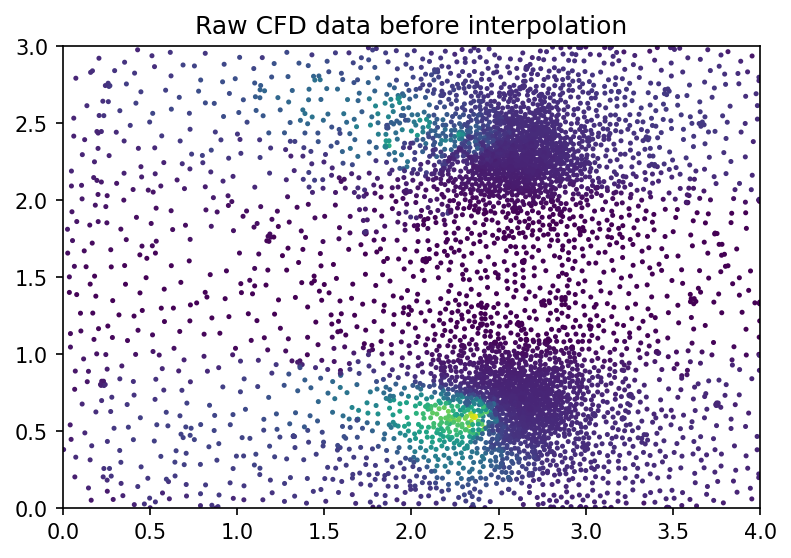

In [12]:
fig,ax = plt.subplots(1,1,num=1,figsize=(6,4),dpi=150)
ax.scatter(array[:,1],array[:,3],s=2,c=array[:,14],cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_title('Raw CFD data before interpolation')

# Interpolation

<u><b>Cubic</b></u> interpolation scheme used for all variables.

In [11]:
m = 4.0 + 1e-10
n = 3.0 + 1e-10
x = array[:,1]
z = array[:,3]
xvelocity = array[:,8]
yvelocity = array[:,9]
zvelocity = array[:,10]
temperature = array[:,12]
dpm_concentration = array[:,13]
prob_infection = array[:,20]

grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]

grid_u = griddata((x, z), xvelocity, (grid_x, grid_z), method='cubic')
grid_v = griddata((x, z), yvelocity, (grid_x, grid_z), method='cubic')
grid_w = griddata((x, z), zvelocity, (grid_x, grid_z), method='cubic')
grid_t = griddata((x, z), temperature, (grid_x, grid_z), method='cubic')
grid_d = griddata((x, z), dpm_concentration, (grid_x, grid_z), method='cubic')
grid_p = griddata((x, z), prob_infection, (grid_x, grid_z), method='cubic')

grid_u[np.isnan(grid_u)] = 0
grid_v[np.isnan(grid_v)] = 0
grid_w[np.isnan(grid_w)] = 0
grid_t[np.isnan(grid_t)] = 294
grid_d[np.isnan(grid_d)] = 0
grid_p[np.isnan(grid_p)] = 0

# Output plots

In [9]:
xcoord = grid_x.flatten()
ycoord = np.ones(xcoord.size)*1.5
zcoord = grid_z.flatten()
x_vel = grid_u.flatten()
y_vel = grid_v.flatten()
z_vel = grid_w.flatten()
ttemp = grid_t.flatten()
dpm_c = grid_d.flatten()
probi = grid_p.flatten()

Text(0.5, 1.0, 'CFD data after interpolation')

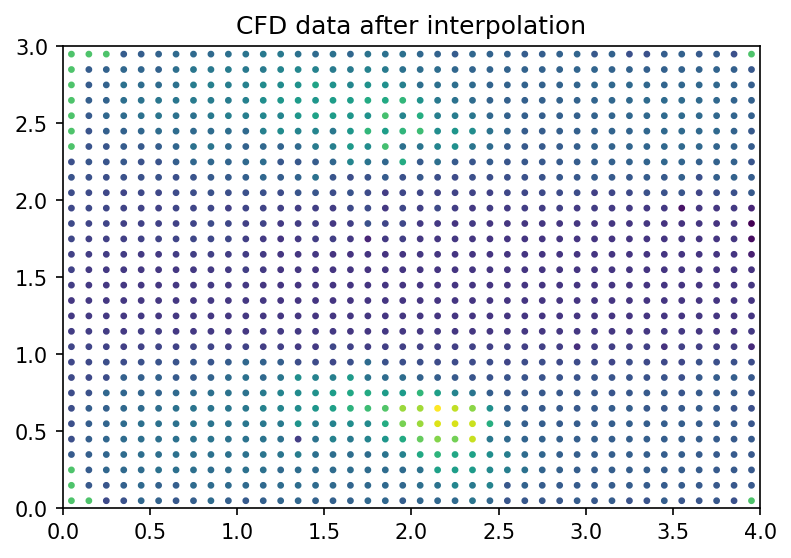

In [13]:
fig,ax = plt.subplots(1,1,num=1,figsize=(6,4),dpi=150)
ax.scatter(xcoord,zcoord,s=5,c=ttemp,cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_title('CFD data after interpolation')

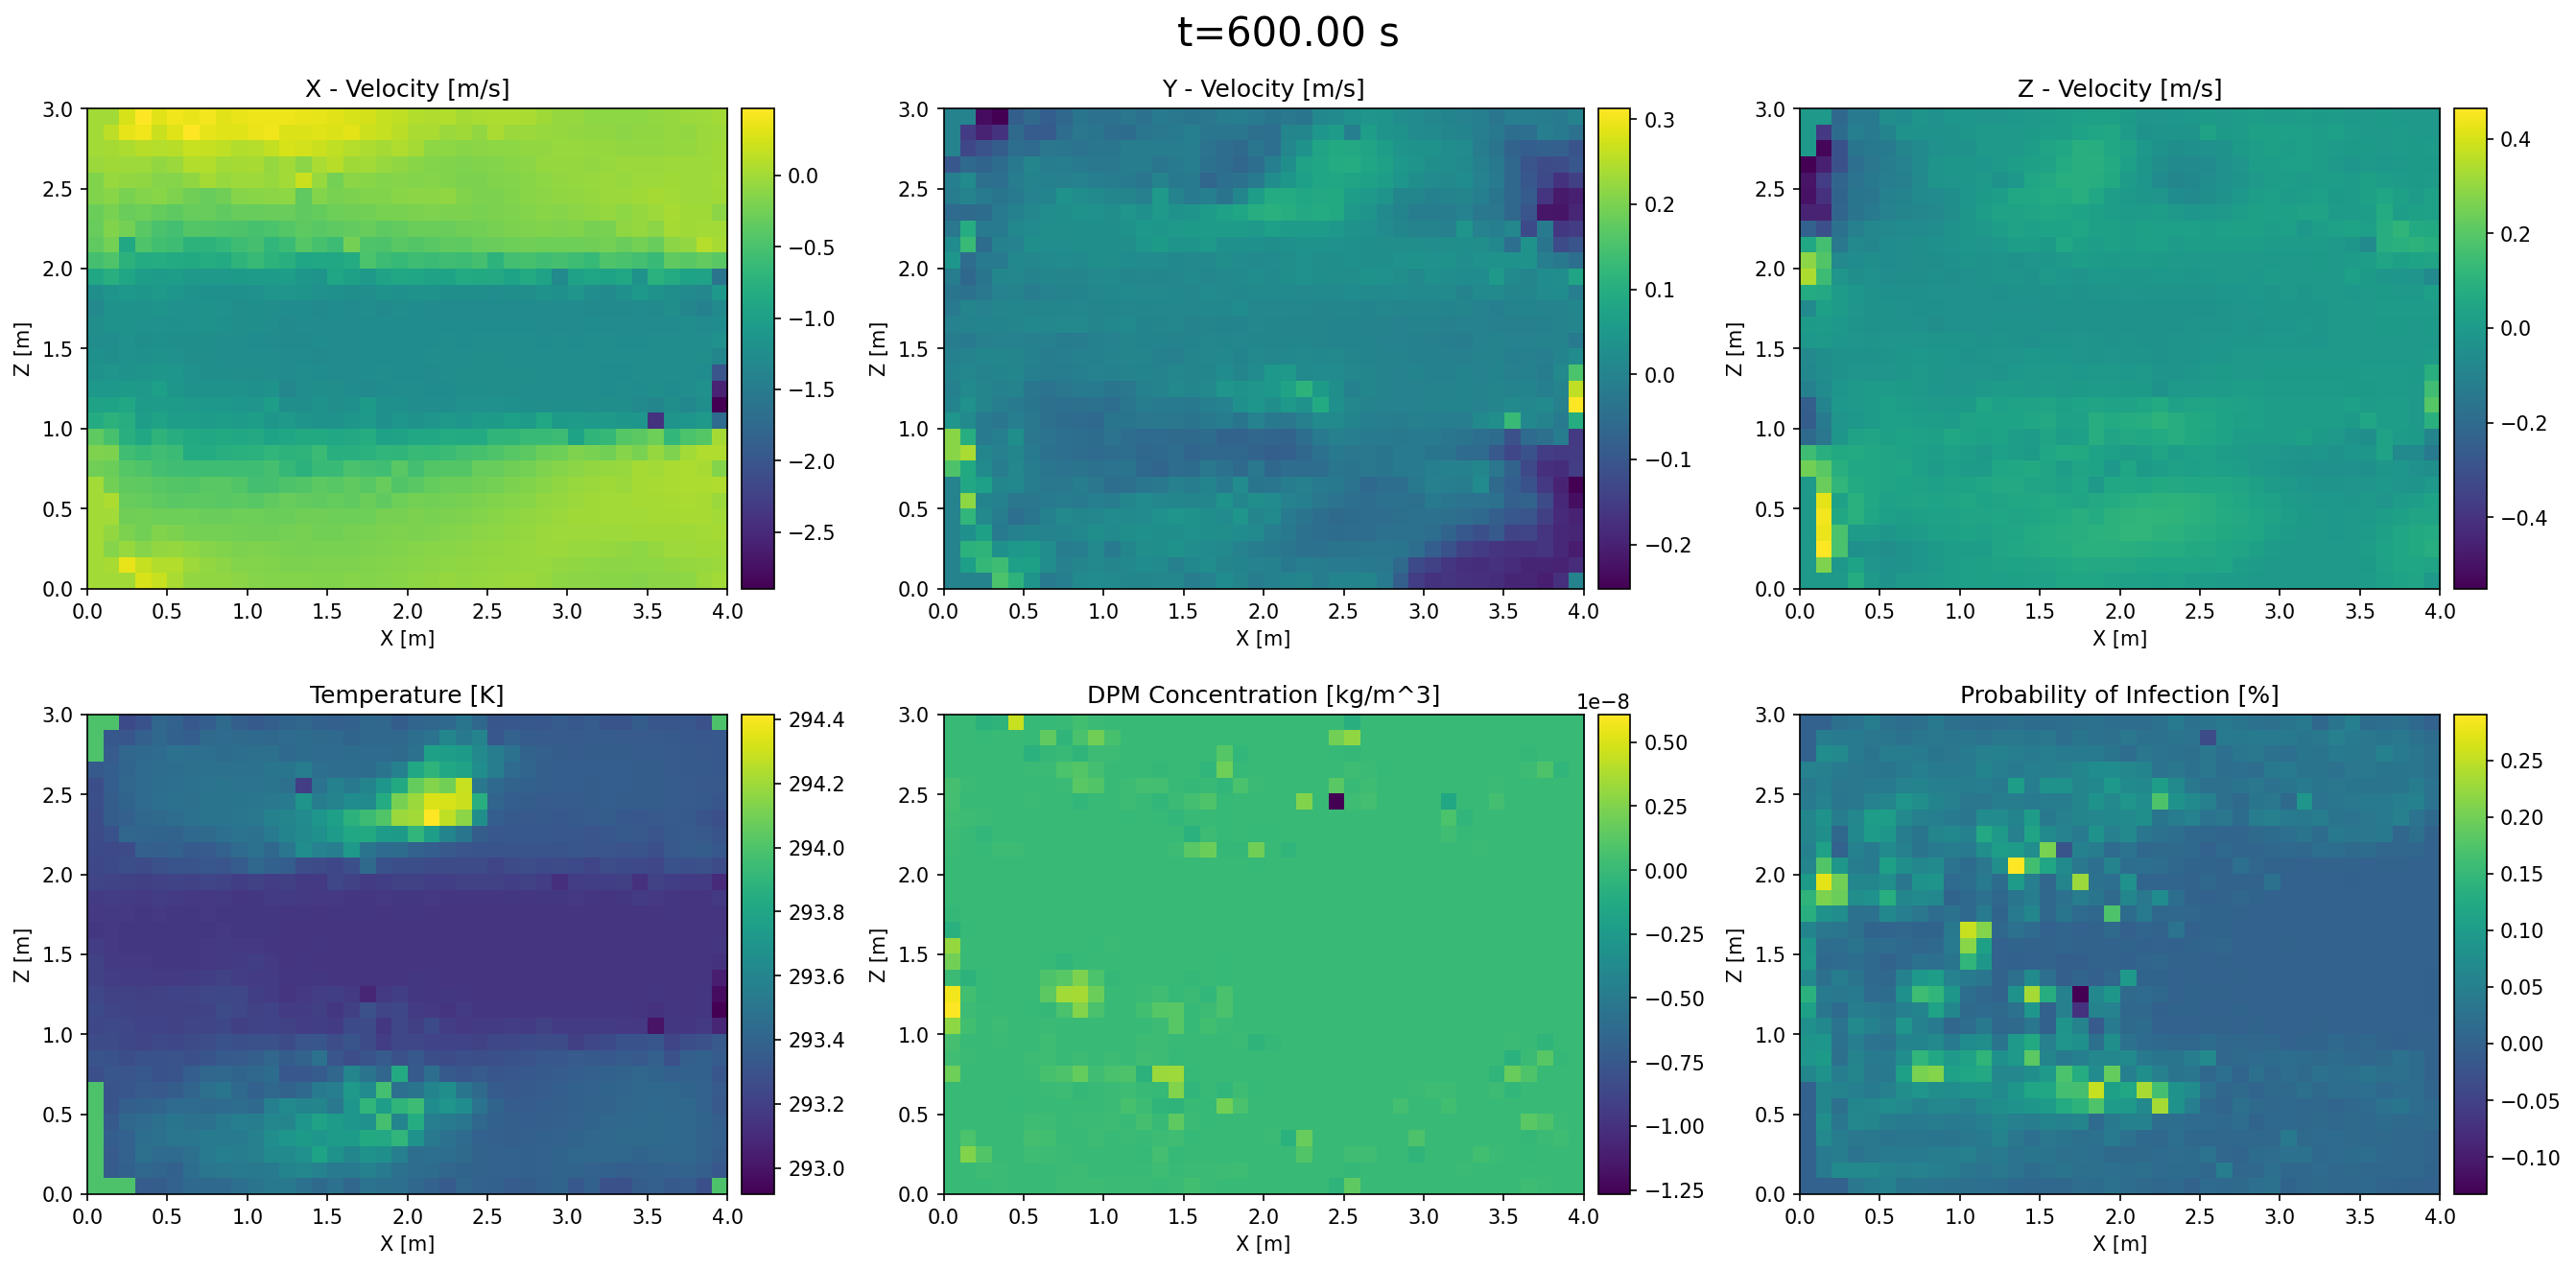

In [14]:
fig,axs = plt.subplots(2,3,figsize = (18,9), dpi=150)

axs = axs.flatten()

im1 = axs[0].imshow(grid_u.T,extent=[0,m,0,n])
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_title('X - Velocity [m/s]')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2 = axs[1].imshow(grid_v.T,extent=[0,m,0,n])
axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_title('Y - Velocity [m/s]')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

im3 = axs[2].imshow(grid_w.T,extent=[0,m,0,n])
axs[2].set_xlabel('X [m]')
axs[2].set_ylabel('Z [m]')
axs[2].set_title('Z - Velocity [m/s]')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im3, cax=cax)

im4 = axs[3].imshow(grid_t.T,extent=[0,m,0,n])
axs[3].set_xlabel('X [m]')
axs[3].set_ylabel('Z [m]')
axs[3].set_title('Temperature [K]')
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im4, cax=cax)

im5 = axs[4].imshow(grid_d.T,extent=[0,m,0,n])
axs[4].set_xlabel('X [m]')
axs[4].set_ylabel('Z [m]')
axs[4].set_title('DPM Concentration [kg/m^3]')
divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im5, cax=cax)

im6 = axs[5].imshow(grid_p.T,extent=[0,m,0,n])
axs[5].set_xlabel('X [m]')
axs[5].set_ylabel('Z [m]')
axs[5].set_title('Probability of Infection [%]')
divider = make_axes_locatable(axs[5])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im6, cax=cax)

plt.suptitle('t=%.2f s' %time, fontsize = 20)
plt.tight_layout()

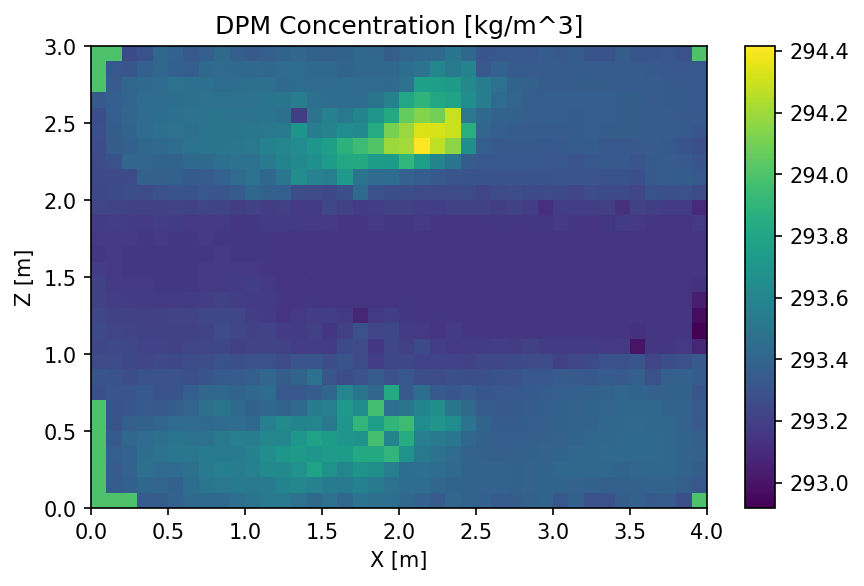

In [16]:
# Individual plots. 
# Change "grid_vel" to "grid_u", "grid_v", "grid_w" to visualize individually.

fig = plt.figure(figsize=(6,4),dpi=150)
ax = plt.gca()
im = plt.imshow(grid_t.T,extent=[0,m,0,n])
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.title('DPM Concentration [kg/m^3]')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
plt.colorbar(im, cax=cax)
plt.show()

# Histogram of sampled particles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

filename_left = '../Case7/Virions Inhaled Sampling/susceptible_nostril_left.dpm'
filename_right = '../Case7/Virions Inhaled Sampling/susceptible_nostril_right.dpm'

(susceptible_nostril_left 13)

(          x           y            z            u            v            w     diameter            t  parcel-mass         mass  n-in-parcel         time    flow-time)

[1.41371669e-14 1.41371669e-14 6.54498469e-14 ... 1.41371669e-14
 1.41371669e-14 5.23598776e-19]


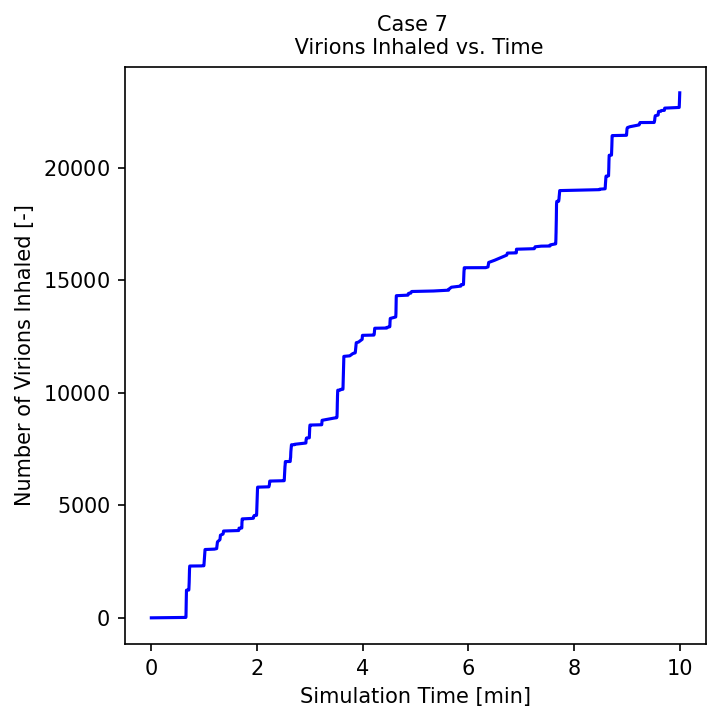

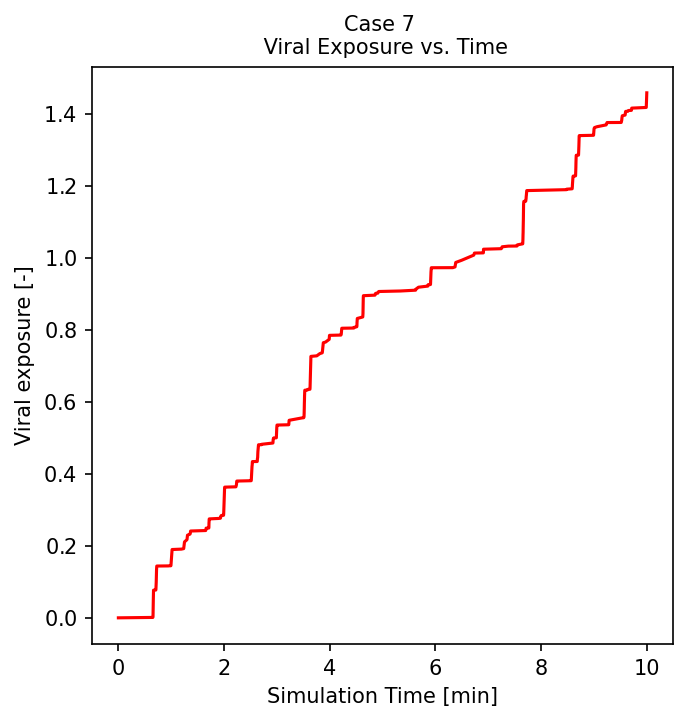

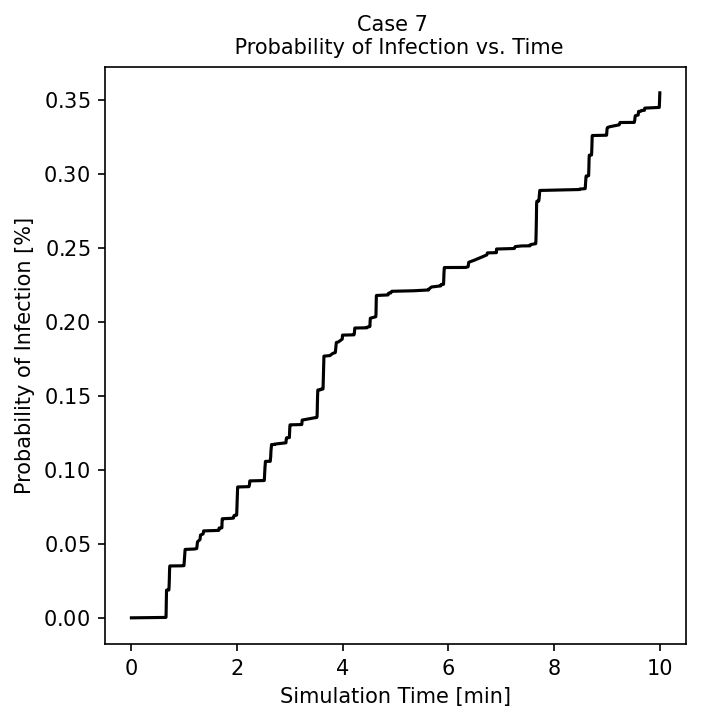

In [2]:
file = open(filename_left,'r')
count = 0
index = 0
twocollist = []
debug = []
for lines in file:

  count+=1

  if count>2: 

    twocollist.append([index,float(lines.split()[7]),float(lines.split()[13][:-1])])
    index+=1

    debug.append([float(lines.split()[1]),float(lines.split()[2]),float(lines.split()[3])])

  else:
    print(lines)

file.close()

del file, count, lines

file = open(filename_right, 'r')
count = 0
for lines in file:

  count+=1

  if count>2: 
    twocollist.append([index,float(lines.split()[7]),float(lines.split()[13][:-1])])
    index+=1

    debug.append([float(lines.split()[1]),float(lines.split()[2]),float(lines.split()[3])])

file.close()

del file, count, lines

twocollist = np.array(twocollist)
twocollist = twocollist[twocollist[:, 2].argsort()]
for i in range(len(twocollist)):
    twocollist[i,0] = i

diamlist = twocollist[:,1]
time = twocollist[:,2]
volumelist = np.pi/6*np.power(diamlist,3)
print(volumelist)

time = np.insert(time,0,0)
time = time/60

volumelist = np.insert(volumelist,0,0)
counts = []

val = 0
sum = 0
for i in range(len(time)):
  sum+=volumelist[i]
  counts.append(sum)
  val+=1

cv = 7000000000 #billion/liter
cv = cv*1000 #in m3

N = cv*np.array(counts)
d = N/16000

k = 410
power = -1/k * d
P = 1 - np.exp(power)

plotx = []
ploty1 = []
ploty2 = []
ploty3 = []

for i in range(int(len(time)/1000)):
  plotx.append(time[i*1000])
  ploty1.append(N[i*1000])
  ploty2.append(d[i*1000])
  ploty3.append(P[i*1000]*100)

fig,ax = plt.subplots(num=2, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty1,'b',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Number of Virions Inhaled [-]')
plt.title('Case 7 \n Virions Inhaled vs. Time', fontsize=10)
plt.savefig('../Case7/Virions Inhaled Sampling/nvirions.jpg')

fig,ax = plt.subplots(num=3, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty2,'r',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Viral exposure [-]')
plt.title('Case 7 \n Viral Exposure vs. Time', fontsize=10)
plt.savefig('../Case7/Virions Inhaled Sampling/exposure.jpg')

fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty3,'k',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Case 7 \n Probability of Infection vs. Time', fontsize=10)
plt.savefig('../Case7/Virions Inhaled Sampling/prob.jpg')

In [3]:
debug = np.array(debug)
xcoord = debug[:,0]
ycoord = debug[:,1]
zcoord = debug[:,2]

In [4]:
print(np.amin(xcoord))
print(np.amax(xcoord))
print(np.amin(ycoord))
print(np.amax(ycoord))
print(np.amin(zcoord))
print(np.amax(zcoord))

2.592
2.6081
1.265
1.2654
2.2875
2.2939


In [8]:
print(len(plotx))

6953


In [10]:
xsample = np.arange(0,10+0.1,step=0.1)
print(xsample)

count = 1
temp = xsample[count]
for i,val in enumerate(plotx):
    if val>=temp:
        print(i,val,count)
        count+=1
        temp = xsample[count]
print(count)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
1 0.59135 1
2 0.5923666666666667 2
3 0.5926166666666667 3
4 0.5927833333333333 4
5 0.5929333333333333 5
28 0.6008666666666667 6
504 0.7083666666666667 7
917 0.9414166666666667 8
918 0.9430833333333334 9
945 1.0 10
1061 1.1915499999999999 11
1063 1.2361166666666668 12
1068 1.3027666666666666 13
1091 1.6519000000000001 14
1092 1.65215 15
1093 1.6523333333333334 16
1182 1.7116666666666667 17
1290 1.8706666666666665 18
1368 1.93 19
1501 2.0 20
1713 2.2243333333333335 21
1714 2.23316666

IndexError: index 101 is out of bounds for axis 0 with size 101

In [5]:
file = open(filename_left,'r')
count = 0

labelvars=[]
indexvars=[]
timearray=[]
diamarray=[3e-05, 5e-05, 1e-05, 1e-06, 0.0001]
time1 = []
time2 = []
time3 = []
time4 = []
time5 = []

for lines in file:
  if count==1: 
    labelvars = lines.split()[1:]

  count+=1

  if count>2: 
    timearray.append(float(lines.split()[13][:-1]))
    indexvars.append(count-2)

    if float(lines.split()[7]) == diamarray[0]:
      time1.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[1]:
      time2.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[2]:
      time3.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[3]:
      time4.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[4]:
      time5.append(float(lines.split()[13][:-1]))

# print(count)
print(lines)
file.close()

del file, count, lines

file = open(filename_right,'r')
count = 0
for lines in file:
  if count==1: 
    labelvars = lines.split()[1:]

  count+=1

  if count>2: 
    timearray.append(float(lines.split()[13][:-1]))
    indexvars.append(count-2)

    if float(lines.split()[7]) == diamarray[0]:
      time1.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[1]:
      time2.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[2]:
      time3.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[3]:
      time4.append(float(lines.split()[13][:-1]))

    if float(lines.split()[7]) == diamarray[4]:
      time5.append(float(lines.split()[13][:-1]))

# print(count)
print(lines)
file.close()

# print(totalarray[1][1:])
# totalarray = totalarray[2:]
# totalarray = np.array(totalarray)[:,1:-1]

# for i in range(len(totalarray)):
#   totalarray[i,-1] = totalarray[i,-1][:-1]

# totalarray = totalarray.astype(float)

(( 2.5946e+00   1.2653e+00   2.2931e+00   5.6210e-02   6.2846e-01  -1.3121e-01   1.0000e-06   2.9871e+02   2.8255e-16   5.2266e-16   5.4061e-01   6.9999e-01   6.0000e+02) speaking_susceptible_0:1138848)

(( 2.6039e+00   1.2653e+00   2.2933e+00   1.4523e-02   1.7687e-01  -3.4079e-02   1.0000e-06   2.9644e+02   3.9138e-16   5.2266e-16   7.4882e-01   7.0000e-01   6.0000e+02) speaking_susceptible_0:1138842)



In [7]:
diamlist = []
for dia in diamarray:
    if not dia in diamlist:
        diamlist.append(dia)

print(diamlist)

[3e-05, 5e-05, 1e-05, 1e-06, 0.0001]


In [7]:
time = np.array(timearray)
time = np.insert(time,0,0)
time = time/60

time1 = np.array(time1)
time1 = np.insert(time1,0,0)
time1 = time1/60

time2 = np.array(time2)
time2 = np.insert(time2,0,0)
time2 = time2/60

time3 = np.array(time3)
time3 = np.insert(time3,0,0)
time3 = time3/60

time4 = np.array(time4)
time4 = np.insert(time4,0,0)
time4 = time4/60

time5 = np.array(time5)
time5 = np.insert(time5,0,0)
time5 = time5/60

counts = []
count1 = []
count2 = []
count3 = []
count4 = []
count5 = []

val = 0
for i in range(len(time)):
  counts.append(val)
  val+=1

val = 0
for i in range(len(time1)):
  count1.append(val)
  val+=1

val = 0
for i in range(len(time2)):
  count2.append(val)
  val+=1

val = 0
for i in range(len(time3)):
  count3.append(val)
  val+=1

val = 0
for i in range(len(time4)):
  count4.append(val)
  val+=1

val = 0
for i in range(len(time5)):
  count5.append(val)
  val+=1

# np.savetxt('../Case 0/Virions Inhaled Sampling/vals_left.csv',counts)
# np.savetxt('../Case 0/Virions Inhaled Sampling/time_left.csv',time)

In [ ]:
dt = 0.2
t = 0
index = 0
temp = t

plotx = []
ploty = []

plotx1 = []
ploty1 = []

plotx2 = []
ploty2 = []

plotx3 = []
ploty3 = []

plotx4 = []
ploty4 = []

plotx5 = []
ploty5 = []

while t<9.82:
    t = t + dt
    while time[index]<t:
        index+=1
    print(t,time[index],counts[index])
    plotx.append(time[index])
    ploty.append(counts[index])

In [ ]:
print(len(plotx))
print(ploty)

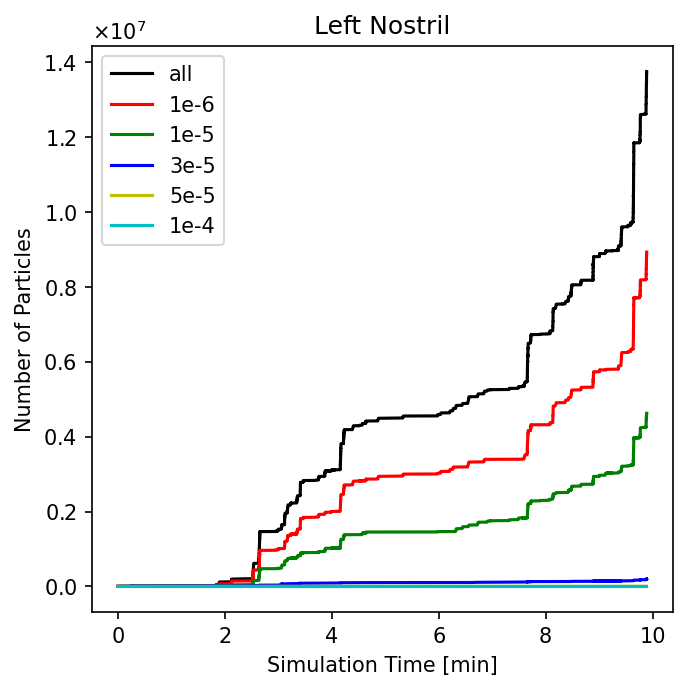

In [8]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(time,counts,'k',label='all')
p4 = ax.plot(time4,count4,'r',label='1e-6')
p3 = ax.plot(time3,count3,'g',label='1e-5')
p1 = ax.plot(time1,count1,'b',label='3e-5')
p2 = ax.plot(time2,count2,'y',label='5e-5')
p5 = ax.plot(time5,count5,'c',label='1e-4')
# p = ax.semilogy(plotx,ploty,'b')
plt.legend()
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Number of Particles')
plt.title('Left Nostril')
plt.savefig('../Case 0/Virions Inhaled Sampling/left.png')

# Export interpolated data to CSV

In [48]:
if savecsv:
    header = 'X [m], Y [m], Z [m], Velocity [m/s], X-Velocity [m/s], Y-Velocity [m/s], Z-Velocity [m/s]'
    output = np.vstack((xcoord,ycoord,zcoord,x_vel,y_vel,z_vel,ttemp, dpm_c, probi)).T
    np.savetxt('output.csv',output,fmt='%.16e',delimiter=', ',newline='\n',header=header, comments='')

# Miscellaneous post-processing tools

### Minimum and maximum of variables
Used for visualisation purposes

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

dx = 0.1
datalocation = "../Case0/Plane Output/"

m = 4.0 + 1e-10
n = 3.0 + 1e-10

xvmin = []
xvmax = []
yvmin = []
yvmax = []
zvmin = []
zvmax = []
temin = []
temax = []
dpmin = []
dpmax = []
pimin = []
pimax = []
vals = []

for i in range(1,601):

    j = i*10
    if i==0: j=1
    # j = i
    print('%d / %d' %(i,600))

    filename = datalocation + 'planeoutput-' + str(j).zfill(4) #+ '.000000'
    table = pd.read_csv(filename, delimiter=',')
    array = np.array(table)

    x = array[:,1]
    z = array[:,3]
    xvelocity = array[:,8]
    yvelocity = array[:,9]
    zvelocity = array[:,10]
    temperature = array[:,12]
    dpm_concentration = array[:,13]
    prob_infection = array[:,20]

    for index,value in enumerate(prob_infection):
        if value == '       -NAN(IND)':
            prob_infection[index]=0

    grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]

    grid_u = griddata((x, z), xvelocity, (grid_x, grid_z), method='cubic')
    grid_v = griddata((x, z), yvelocity, (grid_x, grid_z), method='cubic')
    grid_w = griddata((x, z), zvelocity, (grid_x, grid_z), method='cubic')
    grid_t = griddata((x, z), temperature, (grid_x, grid_z), method='cubic')
    grid_d = griddata((x, z), dpm_concentration, (grid_x, grid_z), method='cubic')
    grid_p = griddata((x, z), prob_infection, (grid_x, grid_z), method='cubic')

    grid_u[np.isnan(grid_u)] = 0
    grid_v[np.isnan(grid_v)] = 0
    grid_w[np.isnan(grid_w)] = 0
    grid_t[np.isnan(grid_t)] = 294
    grid_d[np.isnan(grid_d)] = 0
    grid_p[np.isnan(grid_p)] = 0

    grid_d.clip(min=0)
    grid_p.clip(min=0)

    xvmin.append(np.amin(grid_u))
    xvmax.append(np.amax(grid_u))

    yvmin.append(np.amin(grid_v))
    yvmax.append(np.amax(grid_v))

    zvmin.append(np.amin(grid_w))
    zvmax.append(np.amax(grid_w))

    temin.append(np.amin(grid_t))
    temax.append(np.amax(grid_t))

    dpmin.append(np.amin(grid_d))
    dpmax.append(np.amax(grid_d))

    pimin.append(np.amin(grid_p))
    pimax.append(np.amax(grid_p))

    vals.append(i)

1 / 600
2 / 600
3 / 600
4 / 600
5 / 600
6 / 600
7 / 600
8 / 600
9 / 600
10 / 600
11 / 600
12 / 600
13 / 600
14 / 600
15 / 600
16 / 600
17 / 600
18 / 600
19 / 600
20 / 600
21 / 600
22 / 600
23 / 600
24 / 600
25 / 600
26 / 600
27 / 600
28 / 600
29 / 600
30 / 600
31 / 600
32 / 600
33 / 600
34 / 600
35 / 600
36 / 600
37 / 600
38 / 600
39 / 600
40 / 600
41 / 600
42 / 600
43 / 600
44 / 600
45 / 600
46 / 600
47 / 600
48 / 600
49 / 600
50 / 600
51 / 600
52 / 600
53 / 600
54 / 600
55 / 600
56 / 600
57 / 600
58 / 600
59 / 600
60 / 600
61 / 600
62 / 600
63 / 600
64 / 600
65 / 600
66 / 600
67 / 600
68 / 600
69 / 600
70 / 600
71 / 600
72 / 600
73 / 600
74 / 600
75 / 600
76 / 600
77 / 600
78 / 600
79 / 600
80 / 600
81 / 600
82 / 600
83 / 600
84 / 600
85 / 600
86 / 600
87 / 600
88 / 600
89 / 600
90 / 600
91 / 600
92 / 600
93 / 600
94 / 600
95 / 600
96 / 600
97 / 600
98 / 600
99 / 600
100 / 600
101 / 600
102 / 600
103 / 600
104 / 600
105 / 600
106 / 600
107 / 600
108 / 600
109 / 600
110 / 600
111 / 60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


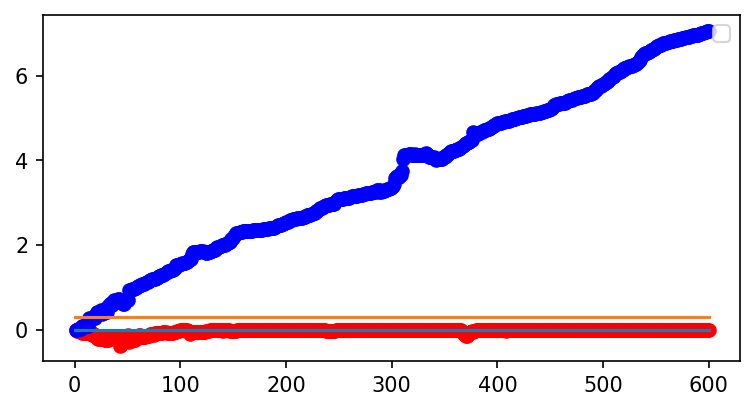

In [55]:
x1mean = -3 #np.mean(xvmin)*1.5
x2mean = 0.75 #np.mean(xvmax)*1.5
y1mean = -0.5 #np.mean(yvmin)*1.25
y2mean = 0.5 #np.mean(yvmax)*1.25
z1mean = np.mean(zvmin)*1.5 #-0.1,0.5 alternating
z2mean = np.mean(zvmax)*1.5
t1mean = 292.5 #np.mean(temin)
t2mean = 297.25 #np.mean(temax)
d1mean = 0 #np.mean(dpmin)*1.5
d2mean = 1.5e-7 #np.mean(dpmax)*1.5
p1mean = 0 #np.mean(pimin)*1.5
p2mean = 0.3 #np.mean(pimax)*1.5


fig,ax = plt.subplots(figsize=(6,3),dpi=150)
# ax.scatter(vals,xvmin,c='r')
# ax.scatter(vals,xvmax,c='b')
# ax.scatter(vals,yvmin,c='r')
# ax.scatter(vals,yvmax,c='b')
# ax.scatter(vals,zvmx,c=in,c='r')
# ax.scatter(vals,zvma'b')
# ax.scatter(vals,temin,c='r')
# ax.scatter(vals,temax,c='b')
# ax.scatter(vals,np.abs(dpmin),c='r')
# ax.scatter(vals,dpmax,c='b')
ax.scatter(vals,pimin,c='r')
ax.scatter(vals,pimax,c='b')

# ax.plot([0,600],[x1mean,x1mean])
# ax.plot([0,600],[x2mean,x2mean])
# ax.plot([0,600],[y1mean,y1mean])
# ax.plot([0,600],[y2mean,y2mean])
# ax.plot([0,600],[z1mean,z1mean],label=str(z1mean))
# ax.plot([0,600],[z2mean,z2mean],label=str(z2mean))
# ax.plot([0,600],[t1mean,t1mean])
# ax.plot([0,600],[t2mean,t2mean])
# ax.plot([0,600],[d1mean,d1mean])
# ax.plot([0,600],[d2mean,d2mean])
ax.plot([0,600],[p1mean,p1mean])
ax.plot([0,600],[p2mean,p2mean])

plt.legend()